# Ejemplo de aplicación Web Map Service (WMS) utilizando una biblioteca popular como OWSLib.

**Primero, asegúrate de tener instalada la biblioteca OWSLib**

In [3]:
!pip install OWSLib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.7 MB/s eta 0:00:00


In [4]:
from owslib.wms import WebMapService
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

***URL de un servicio WMS público (puedes elegir uno diferente si prefieres)***


In [5]:
wms_url = 'https://ahocevar.com/geoserver/wms'

**Acceder al servicio WMS**

In [6]:
wms = WebMapService(wms_url, version='1.1.1')


**Mostrar algunas capas disponibles**

In [9]:
print("Capas disponibles en el WMS:")
for layer_name in list(wms.contents)[:15]:  # Mostrar solo las primeras 5 capas
    print(layer_name)

Capas disponibles en el WMS:
ne:ne
ne:NE1_HR_LC_SR_W_DR
opengeo:countries
w3geo:estrab-msgis-zustand
ne:ne_10m_admin_0_boundary_lines_land
ne:ne_10m_admin_0_countries
ne:ne_10m_admin_1_states_provinces_lines_shp
ne:ne_10m_populated_places
ne:ne_10m_roads
usa:states
topp:states
osm:water_areas


**Seleccionar una capa para obtener la imagen del mapa (cambiar a otra capa si lo prefieres)**


In [18]:
layer = 'topp:states'

**Obtener la imagen del WMS (definir el área de interés y la proyección)**


In [19]:
img = wms.getmap(layers=[layer],
                 srs='EPSG:4326',  # Sistema de referencia espacial
                 bbox=(-130, 24, -66.5, 50),  # Área de interés (xmin, ymin, xmax, ymax)
                 size=(800, 400),  # Tamaño de la imagen en píxeles
                 format='image/png',  # Formato de la imagen
                 transparent=True)

**Convertir la respuesta en una imagen y mostrarla**


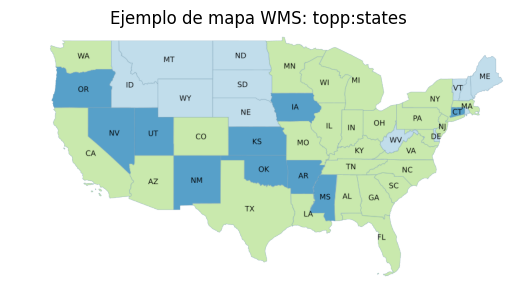

In [20]:
image = Image.open(BytesIO(img.read()))
plt.imshow(image)
plt.title('Ejemplo de mapa WMS: topp:states')
plt.axis('off')  # No mostrar los ejes
plt.show()